# WE INVESTIGATE THE DISTRIBUTION OF CARS ACROSS THE USA & CANADA


In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [119]:
df = pd.read_csv('USA_cars_datasets.csv')
df.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [120]:
df.drop('vin', axis=1, inplace=True)

In [121]:
df.head()

,price,brand,model,year,title_status,mileage,color,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117,black,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552,silver,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590,silver,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146,blue,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654,red,167763266,florida,usa,22 hours left


In [122]:
df.columns

Index(['price', 'brand', 'model', 'year', 'title_status', 'mileage', 'color',
       'lot', 'state', 'country', 'condition'],
      dtype='object')

In [123]:
len(df.columns)

11

In [124]:
df.shape

(2499, 11)

In [125]:
df.describe()

,price,year,mileage,lot
count,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,84900.000000,2020.000000,1.017936e+06,1.678055e+08


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'mileage'}>,
        <AxesSubplot:title={'center':'lot'}>]], dtype=object)

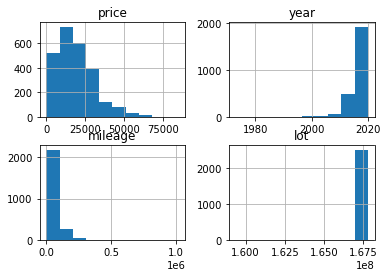

In [126]:
df.hist()

## WE PLOT A CORRELATION BETWEEN THE NUMBER OF CARS AND PRICES

Text(0, 0.5, 'Number of Cars')

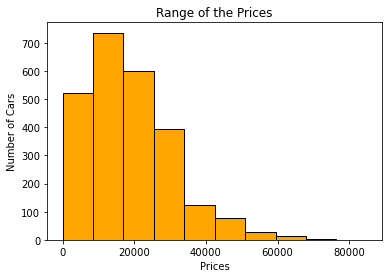

In [127]:
plt.hist(df['price'], color='orange', edgecolor='black',bins=10)
# We add Labels
plt.title('Range of the Prices')
plt.xlabel('Prices')
plt.ylabel('Number of Cars')

## PLOT BASED ON THE TITLE STATUS OF THE CARS

(array([2336.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         163.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

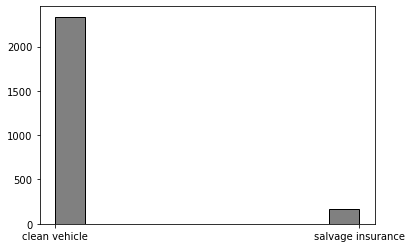

In [133]:
plt.hist(df['title_status'], color='grey', edgecolor='black',bins=10)

## WE SHOW HOW MANY CARS ORIGINATE FROM EACH COUNTRY BASED ON THE DATASET


Text(0.5, 0, 'Country')

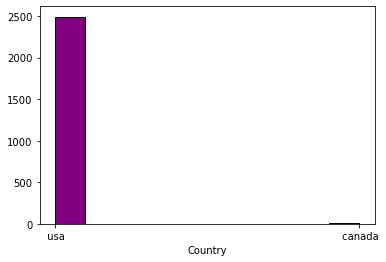

In [128]:
plt.hist(df['country'], color='purple', edgecolor='black', bins=10)
plt.xlabel('Country')

About 97% of the cars are from USA while Canada has about 3%.

## WE INVESTIGATE THE RELATION BETWEEN THE MILEAGE & PRICE OF THE CARS

#### USING SCATTERPLOT

<AxesSubplot:xlabel='price', ylabel='mileage'>

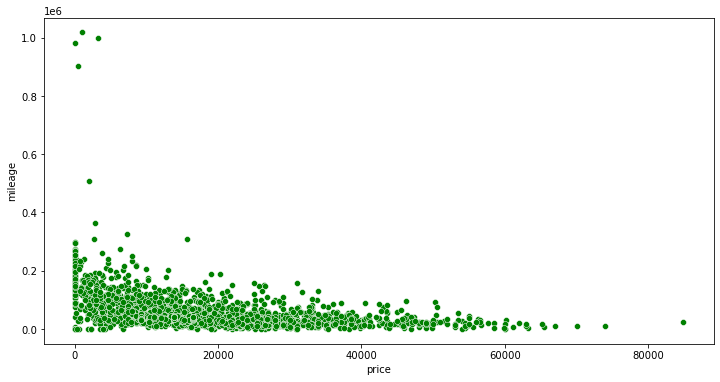

In [98]:
plt.figure(figsize=(12,6))
sns.scatterplot(color='green',x=df['price'], y=df['mileage'])

  #### USING JOINTPLOT

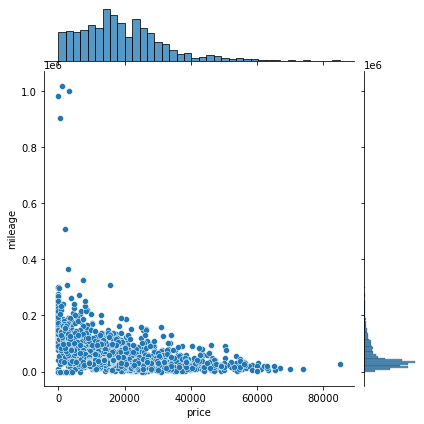

In [89]:
sns.jointplot(x=df['price'], y=df['mileage'])

 ## WE INVESTIGATE THE PRICE RANGE OF VARIOUS CAR MODELS USING SEABORN BOXPLOT

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, 'peterbilt'),
  Text(1, 0, 'heartland'),
  Text(2, 0, 'jaguar'),
  Text(3, 0, 'acura'),
  Text(4, 0, 'hyundai'),
  Text(5, 0, 'honda'),
  Text(6, 0, 'toyota'),
  Text(7, 0, 'mazda'),
  Text(8, 0, 'audi'),
  Text(9, 0, 'gmc'),
  Text(10, 0, 'jeep'),
  Text(11, 0, 'ram'),
  Text(12, 0, 'nissan'),
  Text(13, 0, 'kia'),
  Text(14, 0, 'infiniti'),
  Text(15, 0, 'dodge'),
  Text(16, 0, 'chevrolet'),
  Text(17, 0, 'lincoln'),
  Text(18, 0, 'chrysler'),
  Text(19, 0, 'buick'),
  Text(20, 0, 'mercedes-benz'),
  Text(21, 0, 'ford'),
  Text(22, 0, 'land'),
  Text(23, 0, 'cadillac'),
  Text(24, 0, 'bmw'),
  Text(25, 0, 'maserati'),
  Text(26, 0, 'lexus'),
  Text(27, 0, 'harley-davidson')])

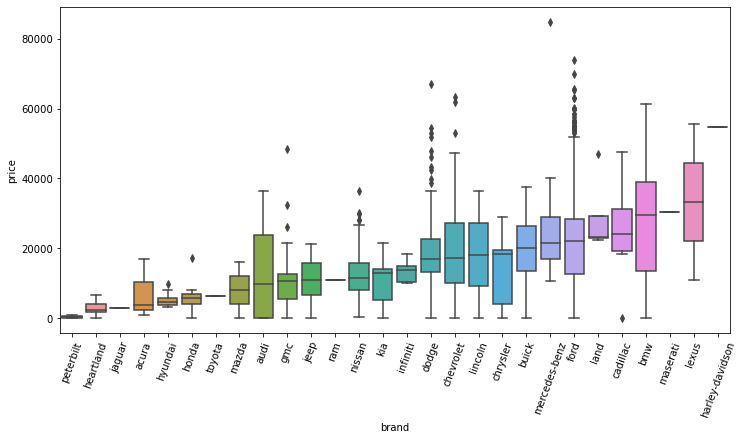

In [92]:
plt.figure(figsize=(12,6))
sorted_nb = df.groupby(['brand'])['price'].median().sort_values()
sns.boxplot(x=df['brand'], y=df['price'], order=list(sorted_nb.index))
plt.xticks(rotation=70)

## WE VISUALIZE HOW MANY CARS COME FROM THE TOP 30 STATES IN USA, AS WELL AS CANADA

<AxesSubplot:>

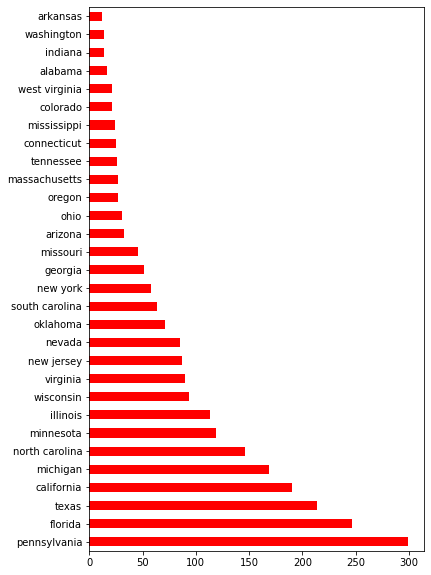

In [101]:
df['state'].value_counts().head(30).plot(color= 'red',kind='barh', figsize=(6,10))

C:\Users\Valentine Enedah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 [Text(0, 0, 'black'),
  Text(1, 0, 'silver'),
  Text(2, 0, 'blue'),
  Text(3, 0, 'red'),
  Text(4, 0, 'white'),
  Text(5, 0, 'gray'),
  Text(6, 0, 'orange'),
  Text(7, 0, 'brown'),
  Text(8, 0, 'no_color'),
  Text(9, 0, 'gold'),
  Text(10, 0, 'charcoal'),
  Text(11, 0, 'turquoise'),
  Text(12, 0, 'beige'),
  Text(13, 0, 'green'),
  Text(14, 0, 'dark blue'),
  Text(15, 0, 'maroon'),
  Text(16, 0, 'phantom black'),
  Text(17, 0, 'yellow'),
  Text(18, 0, 'color:'),
  Text(19, 0, 'light blue'),
  Text(20, 0, 'toreador red'),
  Text(21, 0, 'bright white clearcoat'),
  Text(22, 0, 'billet silver metallic clearcoat'),
  Text(23, 0, 'black clearcoat'),
  Text(24, 0, 'jazz blue pearlcoat'),
  Text(25, 0, 'purple'),
  Text(26, 0, 'ruby red metallic tinted clearcoat'),
  Text(2

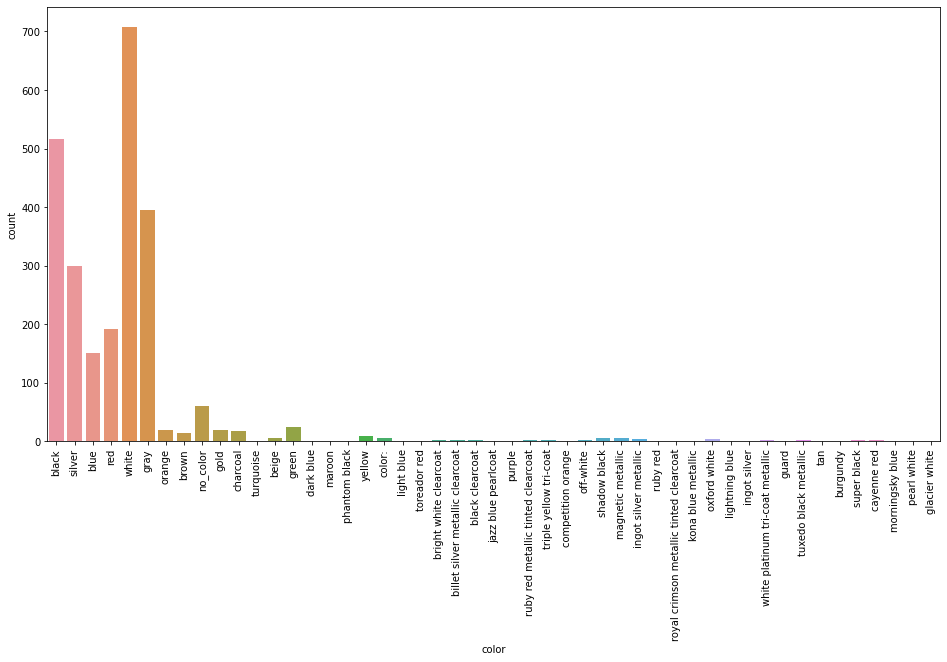

In [103]:
plt.figure(figsize=(16,8))
sns.countplot(df['color'])
plt.xticks(rotation= 90)

## THE CORRELATION HEATMAP OF THE DATASET

<function matplotlib.pyplot.show(close=None, block=None)>

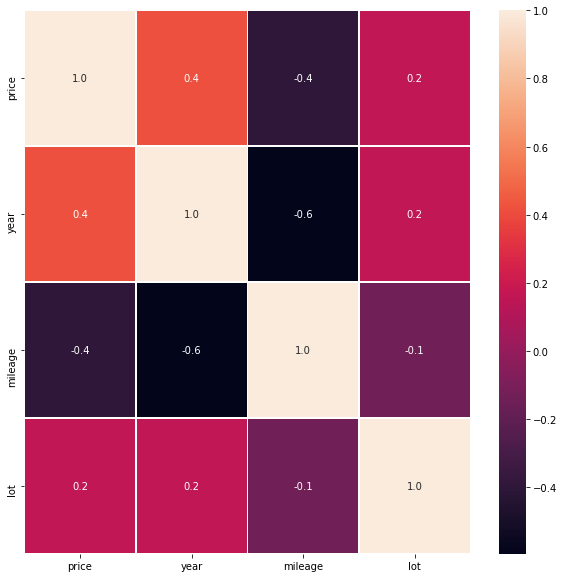

In [104]:
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', ax=ax)
plt.show